# Introduction to Matplotlib

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.plot()

[]

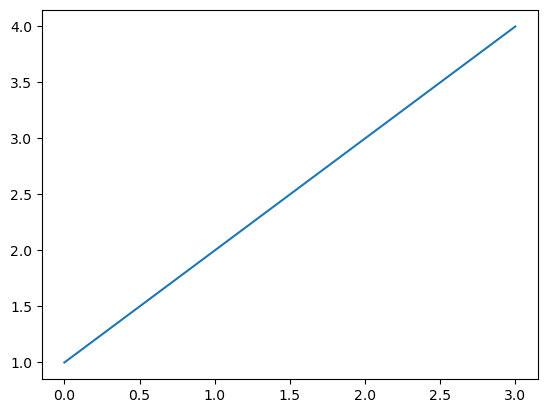

In [3]:
plt.plot([1,2,3,4])
plt.show()

You may be wondering why the x-axis ranges from 0-3 and the y-axis from 1-4. If you provide a single list or array to plot, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you. Since python ranges start with 0, the default x vector has the same length as y but starts with 0. Hence the x data are [0, 1, 2, 3].


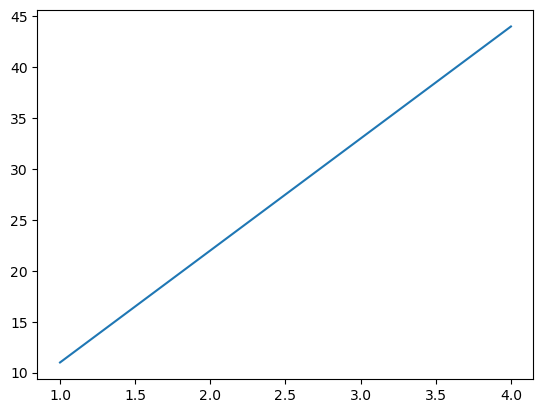

In [48]:
x = [1,2,3,4]
y = [11,22,33,44]
plt.plot(x,y); #put ; to remove [<matplotlib.lines.Line2D at 0x7fbfdd49e430>]
plt.show()

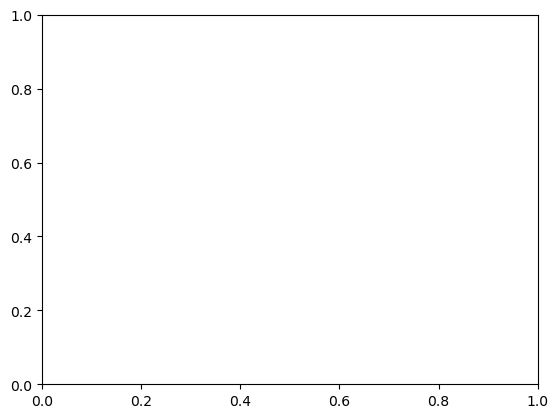

In [49]:
# Creating a plot with the OO verison, confusing way first
# 1st method
fig = plt.figure() #Create a figure
ax = fig.add_subplot() #adds some axs
plt.show()

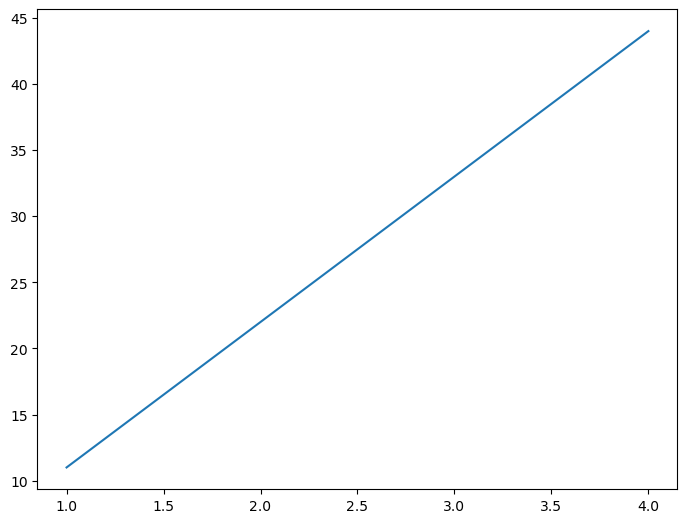

In [6]:
# Second Method
fig = plt.figure() #create a figure
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y) #add some data
plt.show()

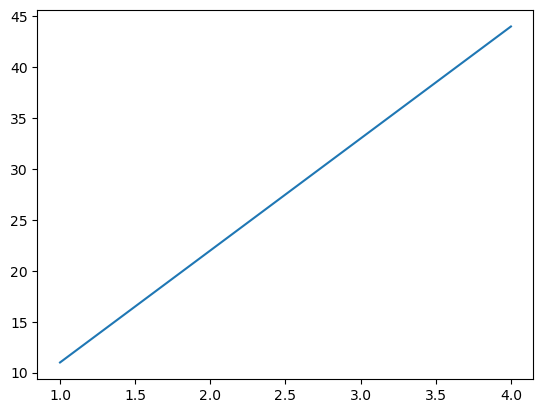

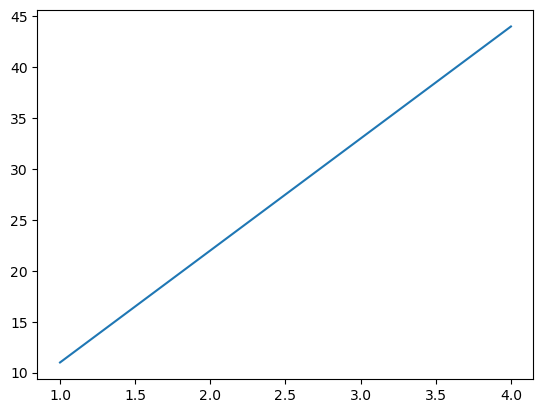

In [51]:
# 3rd method (recommeded)

fig, ax = plt.subplots() #create figure + set of subplots, by default, nrow =1, ncol=1
ax.plot(x,y); #add some data

type(fig), type(ax)
plt.show()

# Matplotlib Example Workflow

## Plot from Pandas DataFrames

In [52]:
import pandas as pd

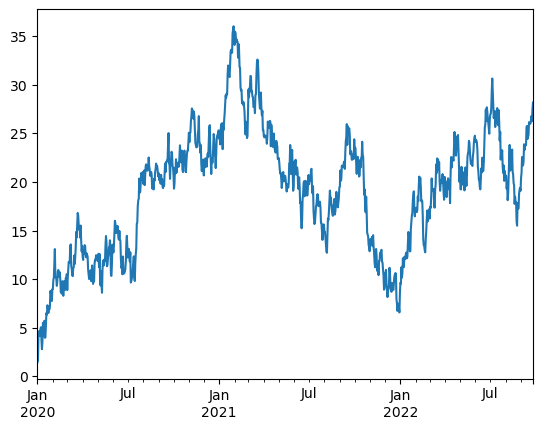

In [53]:
ts = pd.Series(np.random.randn(1000),
               index = pd.date_range("1/1/2020", periods =1000))
ts = ts.cumsum()
ts.plot()
plt.show()

In [54]:
# Make a datafram
car_sales = pd.read_csv("car-sales.csv")

In [55]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [56]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')
car_sales

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/var/folders/4c/jp1y0tjs3w97t7gzy74hv9t40000gn/T/ipykernel_2651/2276578600.py:1: SyntaxWarning: invalid escape sequence '\$'
  car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [57]:
# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000."
1,Honda,Red,87899,4,"$5,000."
2,Toyota,Blue,32549,3,"$7,000."
3,BMW,Black,11179,5,"$22,000."
4,Nissan,White,213095,4,"$3,500."
5,Toyota,Green,99213,4,"$4,500."
6,Honda,Blue,45698,4,"$7,500."
7,Honda,Blue,54738,4,"$7,000."
8,Toyota,White,60000,4,"$6,250."
9,Nissan,White,31600,4,"$9,700."


In [58]:
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))

In [59]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,"$4,000.",2020-01-01
1,Honda,Red,87899,4,"$5,000.",2020-01-02
2,Toyota,Blue,32549,3,"$7,000.",2020-01-03
3,BMW,Black,11179,5,"$22,000.",2020-01-04
4,Nissan,White,213095,4,"$3,500.",2020-01-05
5,Toyota,Green,99213,4,"$4,500.",2020-01-06
6,Honda,Blue,45698,4,"$7,500.",2020-01-07
7,Honda,Blue,54738,4,"$7,000.",2020-01-08
8,Toyota,White,60000,4,"$6,250.",2020-01-09
9,Nissan,White,31600,4,"$9,700.",2020-01-10


In [60]:
car_sales['Price'] = car_sales['Price'].str.replace(r'[\$,\.]', '', regex=True)  # loại bỏ $, .
car_sales['Price'] = car_sales['Price'].str.replace(',', '')    
car_sales["Total Sales"] = car_sales["Price"].astype('int').cumsum()

In [61]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


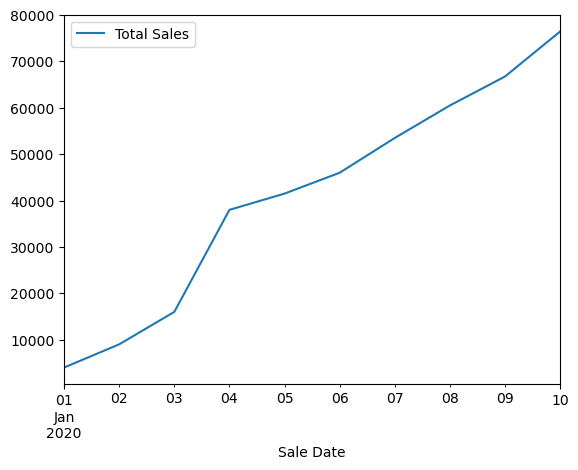

In [82]:
# Let's plot the total sales
car_sales.plot(x="Sale Date", y="Total Sales")
plt.show()

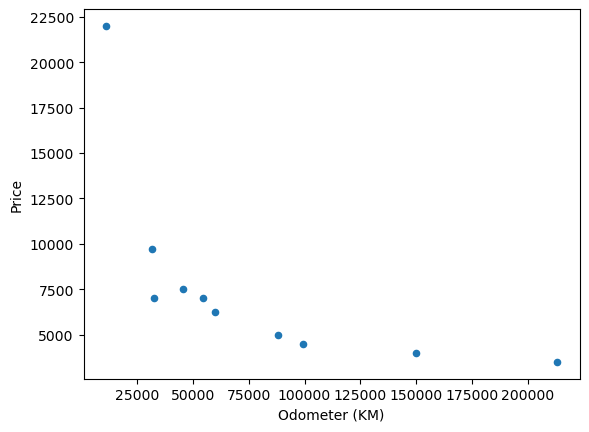

In [83]:
# Reassign price column to int
car_sales["Price"] = car_sales["Price"].astype(int)

# Plot scatter plot with price column as numeric
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter")
plt.show()

In [104]:
# How about bar graph ?
x = np.random.rand(10,4)
print(x)

[[0.53578103 0.98037334 0.99464288 0.42620098]
 [0.93175114 0.87153465 0.01049195 0.43037356]
 [0.22053714 0.64794613 0.72776669 0.90877144]
 [0.29231035 0.07165786 0.56394043 0.08851813]
 [0.76557965 0.43946117 0.84145743 0.50017969]
 [0.09959584 0.33338339 0.21533148 0.03418187]
 [0.21247131 0.43619999 0.50475755 0.71001752]
 [0.04029172 0.38272617 0.10415703 0.86156791]
 [0.10391464 0.34821241 0.09314458 0.87353683]
 [0.89324062 0.50458848 0.53690343 0.71447286]]


In [105]:
# Turn it into a dataframe
df = pd.DataFrame(x, columns = ['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.535781,0.980373,0.994643,0.426201
1,0.931751,0.871535,0.010492,0.430374
2,0.220537,0.647946,0.727767,0.908771
3,0.292310,0.071658,0.563940,0.088518
4,0.765580,0.439461,0.841457,0.500180
5,0.099596,0.333383,0.215331,0.034182
6,0.212471,0.436200,0.504758,0.710018
7,0.040292,0.382726,0.104157,0.861568
8,0.103915,0.348212,0.093145,0.873537
9,0.893241,0.504588,0.536903,0.714473


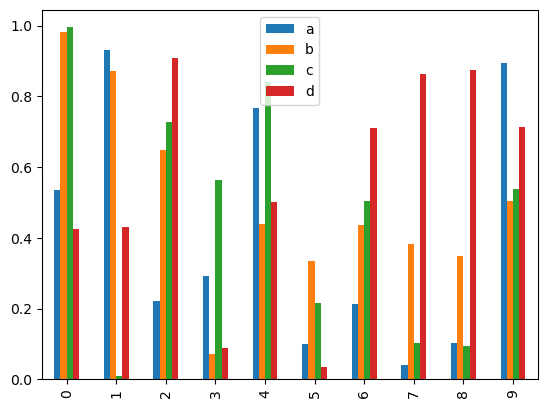

In [106]:
df.plot.bar()
plt.show()

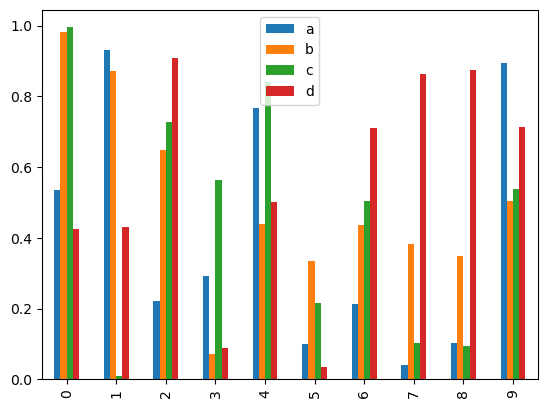

In [107]:
df.plot(kind="bar")
plt.show()

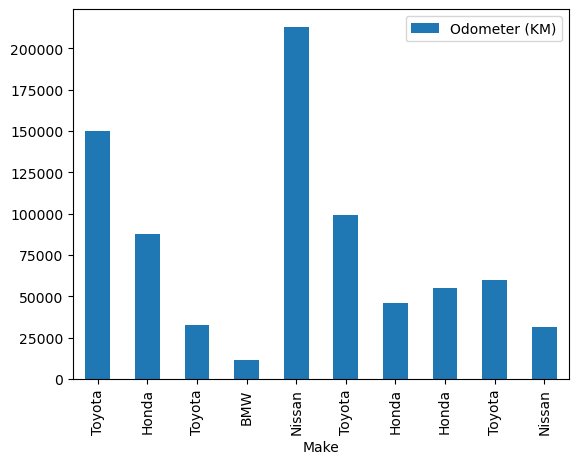

In [108]:
car_sales.plot(x="Make", y = "Odometer (KM)", kind="bar")
plt.show()

In [109]:
car_sales["Odometer (KM)"].plot.hist(bins = 30); #

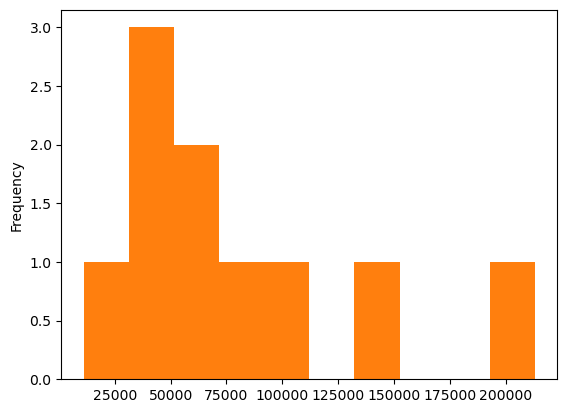

In [110]:
car_sales["Odometer (KM)"].plot(kind="hist")
plt.show()

In [111]:
# Let s try on another dataset
heart_disease = pd.read_csv("heart-disease.csv")

In [112]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


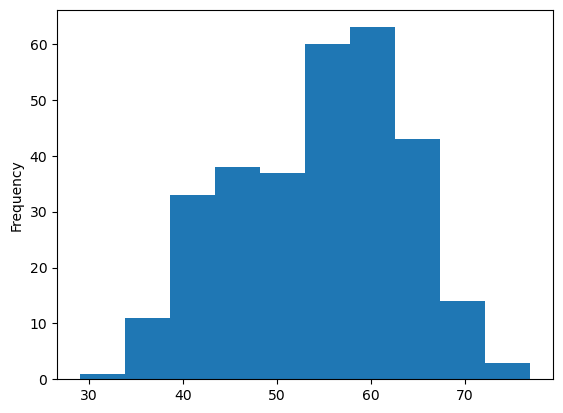

In [113]:
# Create Histogram of Age to see the distribution of age

heart_disease["age"].plot.hist(bins=10)
plt.show()

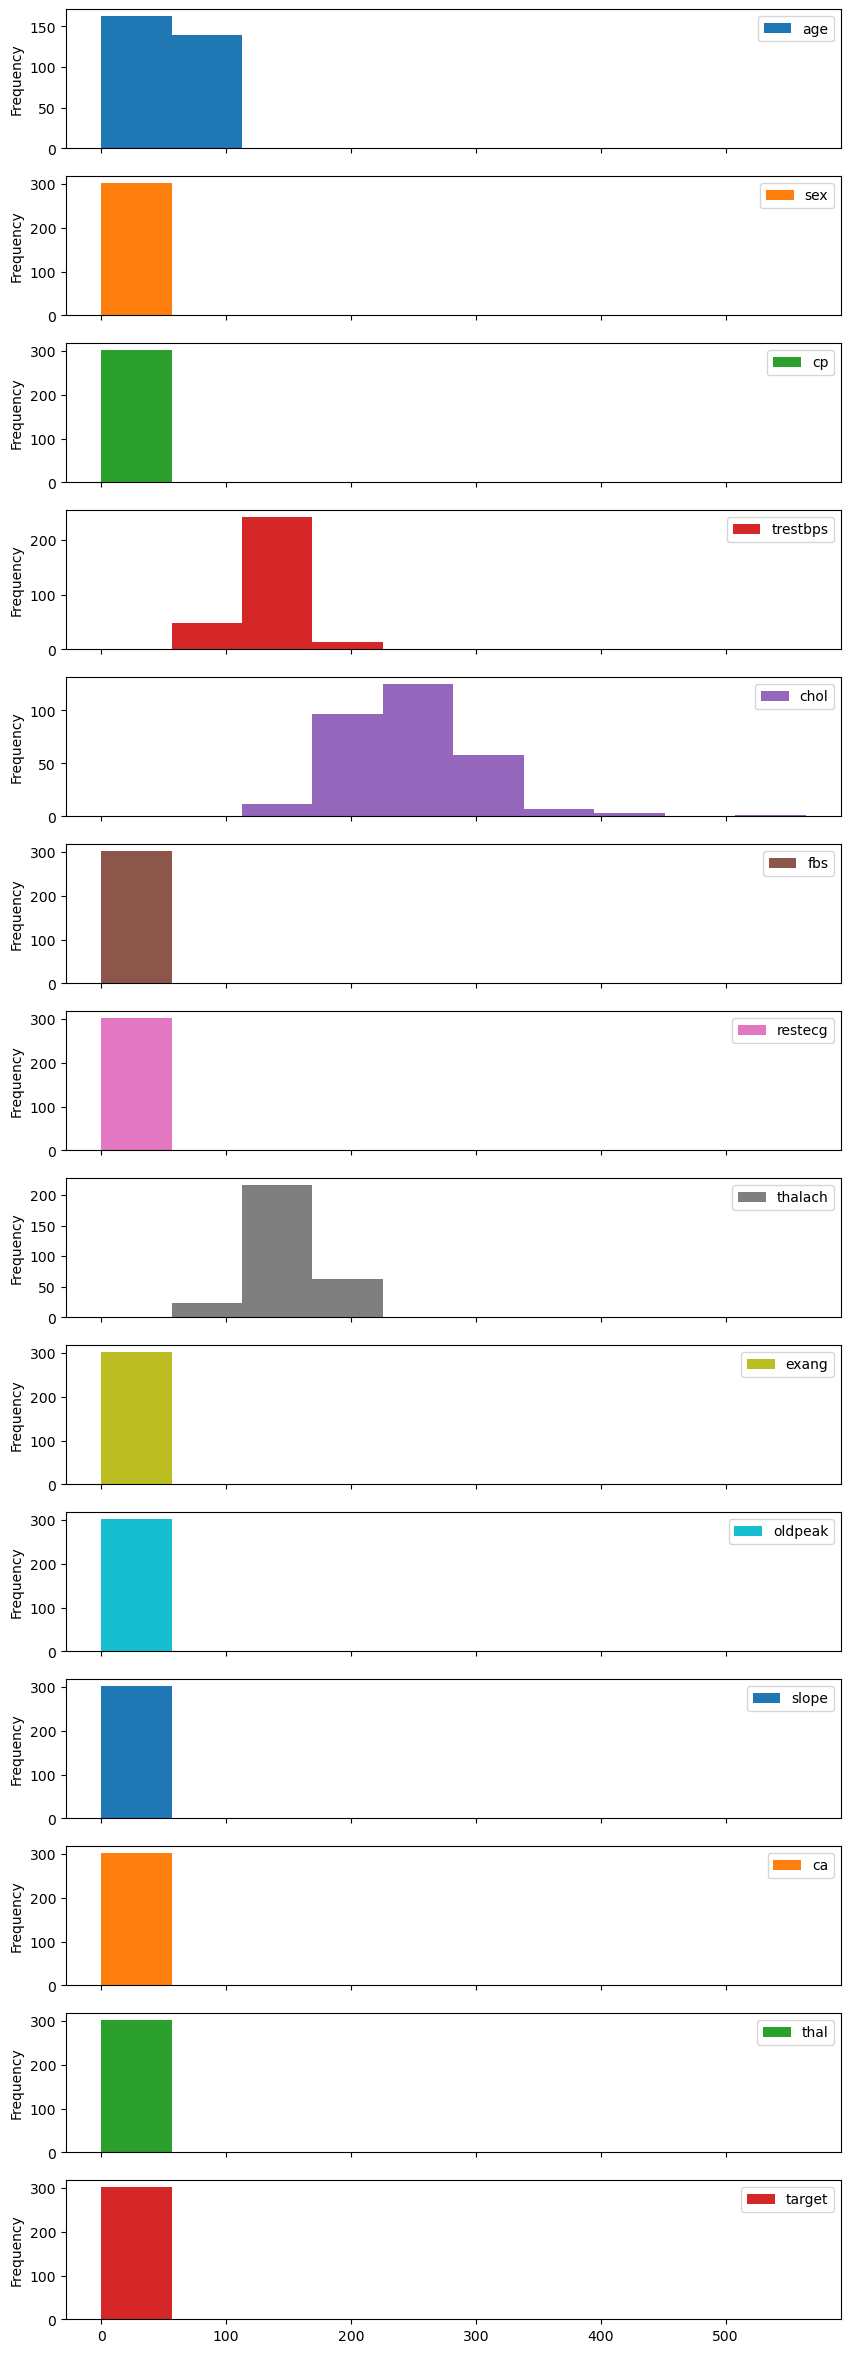

In [114]:
heart_disease.plot.hist(figsize=(10,30), subplots=True)
plt.show()

### Which one should you use ? (Pyplot vs Matplotlib OO Method)

* When plotting something quickly, okay to use Pyplot Method
* When plotting something advanced, use Matplotlib OO Method

In [115]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [116]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [117]:
len(over_50)

208

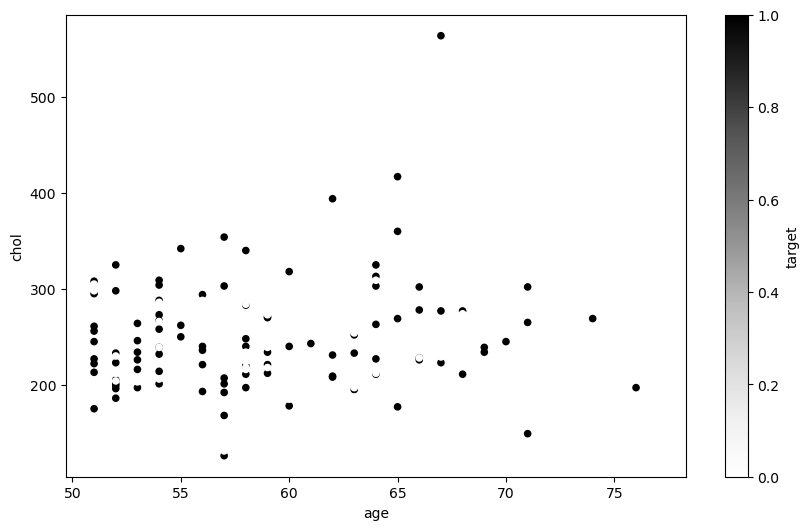

In [118]:
# Pyplot method
over_50.plot(kind = 'scatter',
             x = 'age',
             y = 'chol',
             c = 'target', #c = color the dot based on over_50['target'] col
             figsize=(10,6))
plt.show()

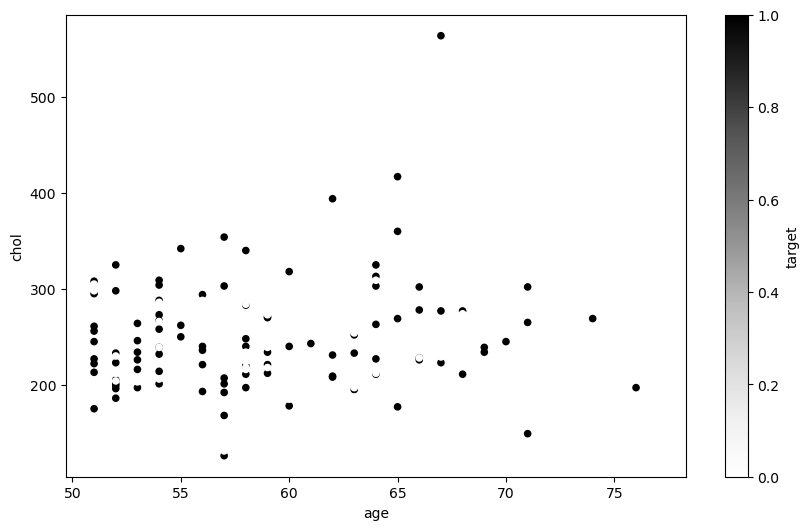

In [119]:
# OO Method mixed with PyPlot method

fig, ax = plt.subplots(figsize=(10,6))
over_50.plot(kind = 'scatter',
             x = 'age',
             y = 'chol',
             c = 'target',
             ax = ax);
plt.show()

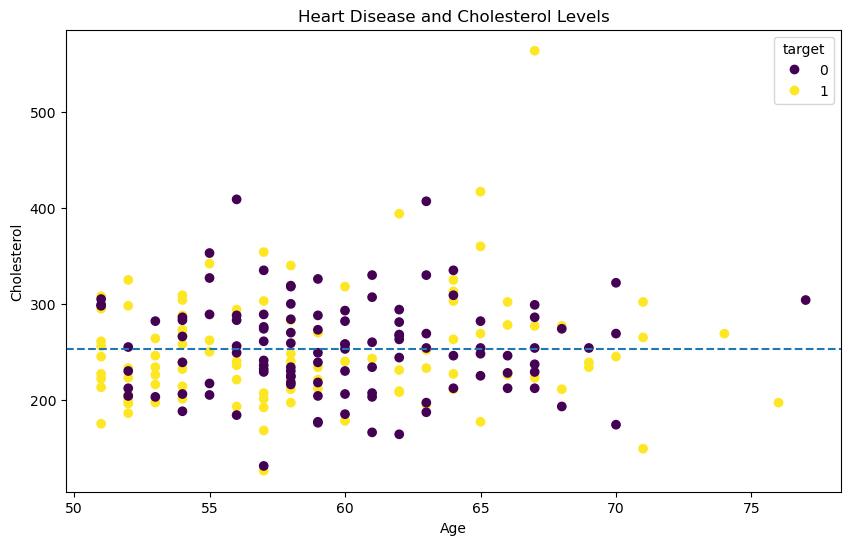

In [120]:
## OO Method from Scratch
fig, ax = plt.subplots(figsize=(10,6))

## Plot the data
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"]);
# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
# Add a legend
ax.legend(*scatter.legend_elements(), title="target"); # * to unpack all the values of Title="target"

#Add a horizontal line
ax.axhline(over_50["chol"].mean(), linestyle = "--")

plt.show()

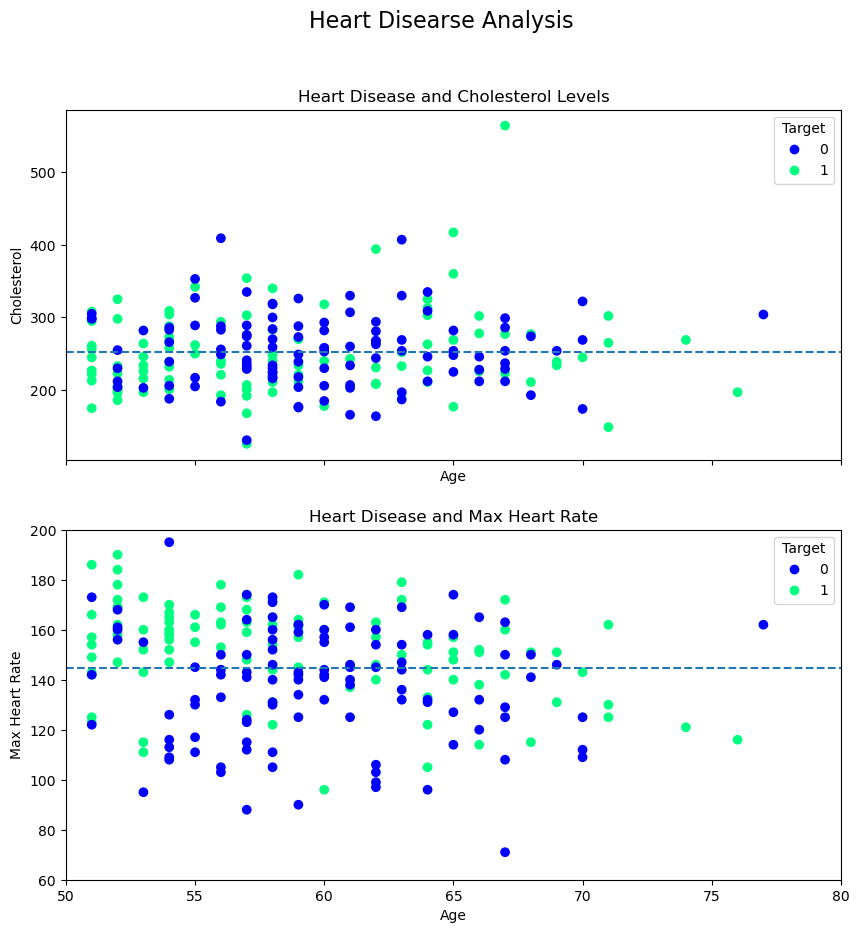

In [121]:
# Set the style
# plt.style.use('seaborn-whitegrid')
# Subplots of Chol, age & Thalach

# Create a single fig with 2 axes
fig, (ax0, ax1) = plt.subplots(nrows = 2,
                               ncols = 1,
                               figsize =(10,10),
                               sharex=True);

# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                      y=over_50["chol"],
                      c=over_50["target"],
                      cmap="winter"); #cmap = color map changes the color scheme: prefer Matplotlib color maps
# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
        xlabel="Age",
        ylabel="Cholesterol");

# Change the x axis limits of ax0
ax0.set_xlim([50,80])

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target"); # * to unpack all the values of Title="target"

#Add a horizontal line
ax0.axhline(over_50["chol"].mean(), linestyle = "--");

# Add data to ax1
scatter = ax1.scatter(x=over_50["age"],
                      y=over_50["thalach"],
                      c=over_50["target"],
                      cmap="winter");
# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate",
        xlabel="Age",
        ylabel="Max Heart Rate");

# Change the x axis limits of ax0
ax1.set_xlim([50,80])
ax1.set_ylim([60,200])

# Add a legend to ax0
ax1.legend(*scatter.legend_elements(), title="Target"); # * to unpack all the values of Title="target"

#Add a horizontal line - mean
ax1.axhline(over_50["thalach"].mean(), linestyle = "--");


# Add Title to Figure
fig.suptitle("Heart Disearse Analysis", fontsize=16);

# Customizing x and y axis limitation
plt.show()
